<h1>Getting the Names of the Community Areas and Their Geographic Coordinates</h1>

In [83]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [84]:
#Webscrape the data from the wikipedia page about the Chicago community areas
import requests

response = requests.get(url="https://en.wikipedia.org/wiki/Community_areas_in_Chicago",)
print(response.status_code)

200


In [85]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [86]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "lxml")

In [87]:
all_tables=soup.find_all("table")

In [88]:
right_table=soup.find('table', class_='wikitable sortable plainrowheaders')

In [89]:
#List A represents the Community Names and List B represents the Population Densities
A=[]
B=[]
for row in right_table.findAll('tr'):
    th=row.findAll('th')
    td=row.findAll('td')
    if len(th)>0 and len(td)>0:
        A.append(th[0].find(text=True).strip())
        B.append(td[4].find(text=True).strip())

In [90]:
del A[len(A)-1]
del B[len(B)-1]

In [91]:
import pandas as pd

In [92]:
A

['Rogers Park',
 'West Ridge',
 'Uptown',
 'Lincoln Square',
 'North Center',
 'Lake View',
 'Lincoln Park',
 'Near North Side',
 'Edison Park',
 'Norwood Park',
 'Jefferson Park',
 'Forest Glen',
 'North Park',
 'Albany Park',
 'Portage Park',
 'Irving Park',
 'Dunning',
 'Montclare',
 'Belmont Cragin',
 'Hermosa',
 'Avondale',
 'Logan Square',
 'Humboldt Park',
 'West Town',
 'Austin',
 'West Garfield Park',
 'East Garfield Park',
 'Near West Side',
 'North Lawndale',
 'South Lawndale',
 'Lower West Side',
 '(The)',
 'Near South Side',
 'Armour Square',
 'Douglas',
 'Oakland',
 'Fuller Park',
 'Grand Boulevard',
 'Kenwood',
 'Washington Park',
 'Hyde Park',
 'Woodlawn',
 'South Shore',
 'Chatham',
 'Avalon Park',
 'South Chicago',
 'Burnside',
 'Calumet Heights',
 'Roseland',
 'Pullman',
 'South Deering',
 'East Side',
 'West Pullman',
 'Riverdale',
 'Hegewisch',
 'Garfield Ridge',
 'Archer Heights',
 'Brighton Park',
 'McKinley Park',
 'Bridgeport',
 'New City',
 'West Elsdon',
 'Ga

In [93]:
B

['29,925.00',
 '21,590.65',
 '24,988.36',
 '16,294.92',
 '17,458.05',
 '32,201.92',
 '21,427.22',
 '32,442.70',
 '4,235.40',
 '8,487.19',
 '11,505.58',
 '5,943.44',
 '7,476.98',
 '27,079.17',
 '16,280.25',
 '17,011.21',
 '11,744.35',
 '13,969.70',
 '20,437.34',
 '20,635.90',
 '18,872.73',
 '20,347.08',
 '15,674.17',
 '18,450.22',
 '13,323.08',
 '13,408.59',
 '10,360.62',
 '11,049.56',
 '11,198.44',
 '16,307.41',
 '11,224.57',
 '21,745.45',
 '13,269.66',
 '13,455.00',
 '12,594.55',
 '11,456.90',
 '3,435.21',
 '12,823.56',
 '16,527.88',
 '7,567.11',
 '16,662.73',
 '11,240.58',
 '17,207.51',
 '10,549.15',
 '7,988.00',
 '8,461.98',
 '3,695.08',
 '7,536.00',
 '8,803.53',
 '3,119.34',
 '1,340.73',
 '7,965.44',
 '7,792.70',
 '2,094.62',
 '1,797.33',
 '8,604.26',
 '6,538.31',
 '16,475.37',
 '11,182.27',
 '16,094.26',
 '8,190.68',
 '16,441.88',
 '18,578.64',
 '10,153.33',
 '11,223.05',
 '15,041.93',
 '9,501.27',
 '8,167.75',
 '8,948.17',
 '9,010.70',
 '12,275.33',
 '6,547.80',
 '9,598.95',
 '7,

In [94]:
df=pd.DataFrame(A,columns=['Community Name'])

In [95]:
df.head()

,Community Name
0,Rogers Park
1,West Ridge
2,Uptown
3,Lincoln Square
4,North Center


In [96]:
#Clean the Data
df['Community Name'][31]='Chicago Loop'

In [97]:
df['Population Desnity(/sq mi)']=B

In [98]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [100]:
from geopy.geocoders import Nominatim

In [101]:
#Use Geocoders to find the Respective Latitute and Longitude Coordinates of the different Community Areas
lat=[]
long=[]
locator = Nominatim(user_agent='myGeocoder')
for value in df['Community Name']:
    location = locator.geocode(value+',Chicago')
    lat.append(location.latitude)
    long.append(location.longitude)

In [102]:
df['Community Latitude']=lat
df['Community Longitude']=long

In [103]:
df.head()

,Community Name,Population Desnity(/sq mi),Community Latitude,Community Longitude
0,Rogers Park,"29,925.00",42.010531,-87.670748
1,West Ridge,"21,590.65",42.003548,-87.696243
2,Uptown,"24,988.36",41.966630,-87.655546
3,Lincoln Square,"16,294.92",41.975990,-87.689616
4,North Center,"17,458.05",41.956107,-87.679160


<h1>Getting the Foursquare Location Data for The Different Community Areas</h1>

In [104]:
import json
from pandas.io.json import json_normalize

In [105]:
CLIENT_ID = 'YZ1NOSDNIKC4RBX5VT1ADHOT1FS4PC2VVN0AWDVPEAMM1TMD' 
CLIENT_SECRET = '0DUKLYAPBE40ZSHI3AYDSNB1RNBK233XLIQ50Q0ZKQBJQTBH' 
VERSION = '20180605' 
LIMIT = 100

In [106]:
#Create a Function that returns the nearby venues based on the Community Names
def getNearbyVenues(names):
    
    venues_list=[]
    for name in (names.tolist()):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            name, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,  
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community Name',  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [107]:
chicago_venues = getNearbyVenues(df['Community Name'])

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center
Lake View
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt Park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale
Lower West Side
Chicago Loop
Near South Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly Hills
Washington Heights
Mount Greenwood
Morgan Park
O'Hare
Edgewater


In [108]:
chicago_venues.shape

(5201, 5)

In [109]:
chicago_venues.groupby('Community Name').count()

,Venue,Venue Latitude,Venue Longitude,Venue Category
Community Name,,,,
Albany Park,1,1,1,1
Archer Heights,100,100,100,100
Armour Square,100,100,100,100
Ashburn,100,100,100,100
Auburn Gresham,100,100,100,100
...,...,...,...,...
West Lawn,100,100,100,100
West Pullman,94,94,94,94
West Ridge,21,21,21,21


In [110]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 350 uniques categories.


In [111]:
chicago_venues.head()

,Community Name,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,Rowlett Park,28.025015,-82.431707,Park
1,Rogers Park,Rogers Park Golf Course,28.019893,-82.426683,Golf Course
2,Rogers Park,Temple Crest Park,28.025126,-82.419121,Park
3,Rogers Park,RiverHills Dr & N 40th St Roundabout,28.021548,-82.414320,Intersection
4,Rogers Park,Rowlett Park (Dog park),28.026378,-82.429982,Dog Run


In [112]:
#Create a Dataframe that inputs each venue entry into a respective dummy variable based on the category type
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add Community Name column back to dataframe
chicago_onehot['Community Name'] = chicago_venues['Community Name'] 

# move Community column to the first column
col_name="Community Name"
first_col = chicago_onehot.pop(col_name)
chicago_onehot.insert(0, col_name, first_col)
chicago_onehot.head()

,Community Name,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Service,American Restaurant,Antique Shop,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
chicago_onehot.shape

(5201, 351)

In [114]:
#Group the community areas based on the dummy variables
chicago_grouped = chicago_onehot.groupby('Community Name').mean().reset_index()
chicago_grouped.head(10)

,Community Name,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Service,American Restaurant,Antique Shop,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Albany Park,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
1,Archer Heights,0.00,0.00,0.0,0.00,0.0,0.0,0.02,0.010000,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.0
2,Armour Square,0.00,0.00,0.0,0.01,0.0,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,Ashburn,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.050000,0.0,...,0.0,0.0,0.0,0.01,0.01,0.0,0.01,0.00,0.00,0.0
4,Auburn Gresham,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.010000,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,Austin,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.010000,0.0,...,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.00,0.02,0.0
6,Avalon Park,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
7,Avondale,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.022222,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
8,Belmont Cragin,0.01,0.00,0.0,0.00,0.0,0.0,0.00,0.020000,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
9,Beverly Hills,0.00,0.01,0.0,0.00,0.0,0.0,0.00,0.050000,0.0,...,0.0,0.0,0.0,0.01,0.00,0.0,0.00,0.02,0.01,0.0


In [115]:
chicago_grouped.shape

(77, 351)

In [116]:
import numpy as np

In [117]:
i=chicago_grouped.drop(['Community Name'], axis=1)

In [118]:
chicago_grouped.head(20)

,Community Name,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Service,American Restaurant,Antique Shop,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Albany Park,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00000
1,Archer Heights,0.00,0.00,0.0,0.00,0.0,0.0,0.02,0.010000,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.00000
2,Armour Square,0.00,0.00,0.0,0.01,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00000
3,Ashburn,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.050000,0.0,...,0.00,0.0,0.0,0.01,0.01,0.0,0.01,0.00,0.00,0.00000
4,Auburn Gresham,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.010000,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00000
5,Austin,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.010000,0.0,...,0.00,0.0,0.0,0.00,0.01,0.0,0.00,0.00,0.02,0.00000
6,Avalon Park,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00000
7,Avondale,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.022222,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00000
8,Belmont Cragin,0.01,0.00,0.0,0.00,0.0,0.0,0.00,0.020000,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00000
9,Beverly Hills,0.00,0.01,0.0,0.00,0.0,0.0,0.00,0.050000,0.0,...,0.00,0.0,0.0,0.01,0.00,0.0,0.00,0.02,0.01,0.00000


In [119]:
#Create a function that returns the most common venue types 
def return_most_common_venues(row, num_top_venues):
    x=0
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    for i in range (num_top_venues):
        if row_categories_sorted[i] != 0:
            x=x+1
    if x != num_top_venues:
        row_categories_sorted.index.values[x:num_top_venues]='N/A'
    return row_categories_sorted.index.values[0:num_top_venues] 


In [120]:
#Find the most common venue types for each community area 
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community Name'] = chicago_grouped['Community Name']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Community Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Park,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,Archer Heights,Mexican Restaurant,Rental Car Location,Donut Shop,Pizza Place,Sandwich Place,Bar,Taco Place,Fast Food Restaurant,Seafood Restaurant,Coffee Shop
2,Armour Square,Chinese Restaurant,Mexican Restaurant,Pizza Place,Bar,Historic Site,Asian Restaurant,Dessert Shop,Hot Dog Joint,Coffee Shop,Bakery
3,Ashburn,Coffee Shop,American Restaurant,Fast Food Restaurant,Seafood Restaurant,Grocery Store,Gym,Shopping Mall,Movie Theater,Brewery,Pizza Place
4,Auburn Gresham,Sandwich Place,Discount Store,Seafood Restaurant,Bar,Lounge,Grocery Store,Park,Fried Chicken Joint,Fast Food Restaurant,Cosmetics Shop
5,Austin,Coffee Shop,Taco Place,Pizza Place,Park,BBQ Joint,Trail,Movie Theater,Bar,Hotel,Brewery
6,Avalon Park,Park,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
7,Avondale,Mexican Restaurant,Pizza Place,Burger Joint,Coffee Shop,Gym,Asian Restaurant,Grocery Store,Bakery,Fast Food Restaurant,American Restaurant
8,Belmont Cragin,Mexican Restaurant,Grocery Store,Park,Greek Restaurant,Discount Store,Donut Shop,Fast Food Restaurant,Seafood Restaurant,Mobile Phone Shop,Pharmacy
9,Beverly Hills,Park,Hotel,Italian Restaurant,American Restaurant,Coffee Shop,Boutique,Clothing Store,Jewelry Store,Café,Dessert Shop


<h1>The K-Means Clustering Model</h1>

In [121]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!pip install folium
import folium 

In [122]:
#Optimize the model with different number of clusters to find the optimal point using the elbow point method
inertia=[]
n=[]
for i in range(21):
    kclusters =i+1
    chicago_grouped_clustering = chicago_grouped.drop('Community Name', 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)
    # check cluster labels generated for each row in the dataframe
    inertia.append(kmeans.inertia_)
    n.append(kclusters)

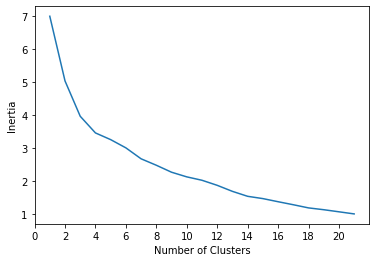

In [123]:
plt.plot(n,inertia)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0,21,2))
plt.show()


<h5>The elbow point seems to occur when the number of clusters=12 and so we will take this as the number of clusters for our model</h5>

In [124]:
kclusters = 12

chicago_grouped_clustering = chicago_grouped.drop('Community Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)


In [125]:
kmeans.labels_[0:50]

array([ 2, 10,  0,  0,  5,  0,  2,  0, 10,  0,  0,  0, 10,  5,  5, 10,  0,
        5,  5,  6,  0,  0,  0,  1,  0,  0,  9, 10,  5,  5,  5,  5,  5, 10,
        0,  3,  0,  0, 10,  5,  5,  0, 10,  0,  0, 11,  5,  0,  0,  5],
      dtype=int32)

In [126]:
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

chicago_merged = df

chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Community Name'), on='Community Name')

chicago_merged.head()

,Community Name,Population Desnity(/sq mi),Community Latitude,Community Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,"29,925.00",42.010531,-87.670748,7,Park,Golf Course,Dog Run,Yoga Studio,Intersection,N/A,N/A,N/A,N/A,N/A
1,West Ridge,"21,590.65",42.003548,-87.696243,0,Pizza Place,Park,Italian Restaurant,Boutique,Performing Arts Venue,Sandwich Place,Laundromat,Grocery Store,Pharmacy,Brewery
2,Uptown,"24,988.36",41.966630,-87.655546,0,Vietnamese Restaurant,Coffee Shop,Grocery Store,Chinese Restaurant,Bakery,Breakfast Spot,Thai Restaurant,Beach,Italian Restaurant,Wine Shop
3,Lincoln Square,"16,294.92",41.975990,-87.689616,5,Mexican Restaurant,Pizza Place,American Restaurant,Chinese Restaurant,Discount Store,BBQ Joint,Bar,Ice Cream Shop,Fast Food Restaurant,Park
4,North Center,"17,458.05",41.956107,-87.679160,0,Bar,Coffee Shop,Pizza Place,Dive Bar,Salon / Barbershop,Brewery,Italian Restaurant,Café,Pub,Beer Garden


In [127]:
import numpy as np

In [128]:
# create map
latitude=41.881944   #Chicago Latitude and Longitude
longitude=-87.627778
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Community Latitude'], chicago_merged['Community Longitude'], chicago_merged['Community Name'], chicago_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>Next we will create clusters based on the population density </h1>

In [129]:
population=chicago_merged['Population Desnity(/sq mi)'].values.tolist()

In [130]:
#convert the population density inputs from string to float after removing the commas from the values
pop=[]
for value in population:
    pop.append(float(value.replace(',', '')))

In [131]:
chicago_merged['Population Desnity(/sq mi)']=pop

In [132]:
minimum=min(pop)
maximum=max(pop)

In [133]:
minimum


927.81

In [134]:
maximum

32442.7

<h5>Now we will create 5 different bins of population density and map the community areas based on these bins

In [135]:
interval=(maximum-minimum)/5
int1=minimum+interval
int2=minimum+interval*2
int3=minimum+interval*3
int4=minimum+interval*4
a=[]
for value in chicago_merged['Population Desnity(/sq mi)']:
    if value<int1:
        a.append(1)
    elif value<int2:
        a.append(2)
    elif value<int3:
        a.append(3)
    elif value<int4:
        a.append(4)
    else:
        a.append(5)

In [136]:
chicago_merged['Population Bins']=a

In [137]:
# create map
latitude=41.881944   #Chicago Latitude and Longitude
longitude=-87.627778
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, pop in zip(chicago_merged['Community Latitude'], chicago_merged['Community Longitude'], chicago_merged['Community Name'], chicago_merged['Population Bins'],chicago_merged['Population Desnity(/sq mi)']):
    label = folium.Popup(str(poi) + '\n Population Desnity:  '+str(pop), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters
       